# Comment rendre une série temporelle stationnaire ?

Nous avons vu que certains modèles requièrent de **stationnariser** la série temporelle pour pouvoir s'ajuster correctement. 

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from utils import *

## 0. Manipuler des time-series avec pandas


La bibliothèque pandas permet de manipuler facilement des séries temporelles avec les objets `DatetimeIndex`. 

En mettant en index une colonne de type date, pandas comprend qu'il s'agit d'une série temporelle et permet d'effectuer des opérations spécifiques :

- Mettre une colonne date en index :
    ```python
    df.set_index('date_column', inplace=True)
    ```
- On peut spécifier la fréquence de la série temporelle (heure, jour, mois, année, etc.) :
    ```python
    df = df.asfreq('D')  # D pour jour, M pour mois, Y pour année, H pour heure, etc.
    ```

- Isoler le jour, le mois, l'année :
    ```python
    df.index.day
    df.index.month
    df.index.year
    ```

- Différencier la série temporelle :
    ```python
    df['diff'] = df['value_column'].diff()
    ```

Documentation pandas sur les séries temporelles : [Working with Time Series Data](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html)

## 1. Rappels sur la stationnarité

### 1.1. La stationnarité

La **stationnarité** est une caractéristiques d'une série temporelle dont les propriétés statistiques (moyenne, variance, autocovariance) ne varient pas au cours du temps. 

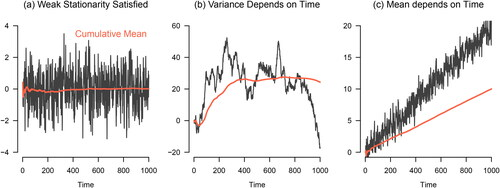

[source](https://www.tandfonline.com/doi/full/10.1080/00273171.2024.2436413)

### 1.2. Le test ADF (Augmented Dickey Fuller)

On peut tester la stationnarité d'une série temporelle avec le test ADF, qui suit la même logique que les test statistiques que nous avions vu en régression linéaire. 

_Carte d'identité_ : 

- ce qui est testé : si la série est stationnaire, mathématiquement on regarde si la série temporelle a une racine unitaire
- HO : la série a une racine unitaire, elle n'est pas stationnaire
- H1 : la série est stationnaire
- règle : 
  - si p-value > 0.05, $P(avoir$ une racine unitaire$|H_0)$ est trop élevée, on ne rejette pas HO, la série n'est pas stationnaire
  - si p-value <= 0.05, $P(avoir$ une racine unitaire$|H_0)$ est suffisamment faible, on rejette HO, la série est stationnaire

Une intuition des racines du polynôme (mieux dans un terminal ```python ./visualizing_ar_2_processes.py```)

/home/basile/Nextcloud/Administratif/Taf/Albert School/4. Linear models/MLII/3.ts/visualizing_ar_2_processes.py:68: SyntaxWarning: invalid escape sequence '\D'
  label=u'$\Delta=0$ boundary')
/home/basile/Nextcloud/Administratif/Taf/Albert School/4. Linear models/MLII/3.ts/visualizing_ar_2_processes.py:114: SyntaxWarning: invalid escape sequence '\o'
  ax_spec = fig_res.add_subplot(212, title='Frequency Response $H(\omega)$',
/home/basile/Nextcloud/Administratif/Taf/Albert School/4. Linear models/MLII/3.ts/visualizing_ar_2_processes.py:115: SyntaxWarning: invalid escape sequence '\o'
  xlabel='frequency $\omega / \pi$')


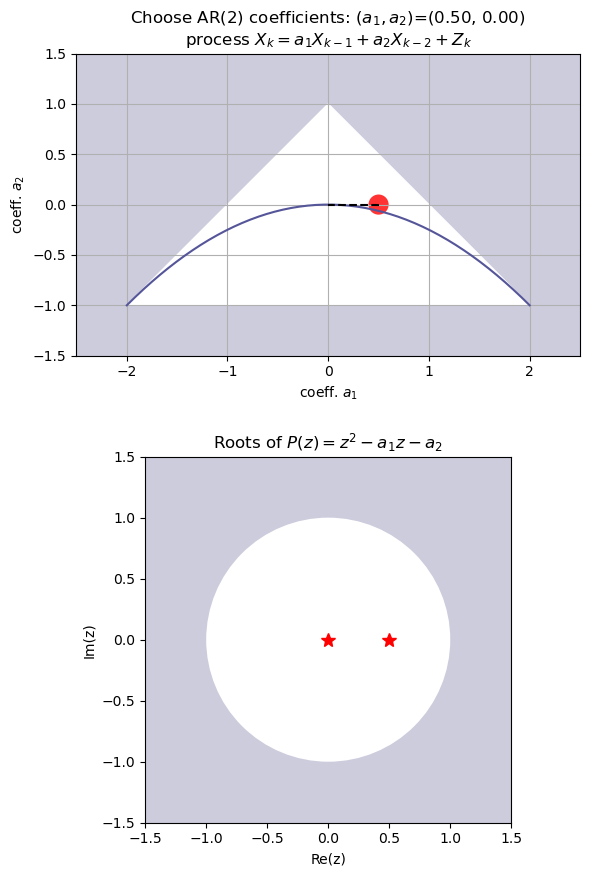

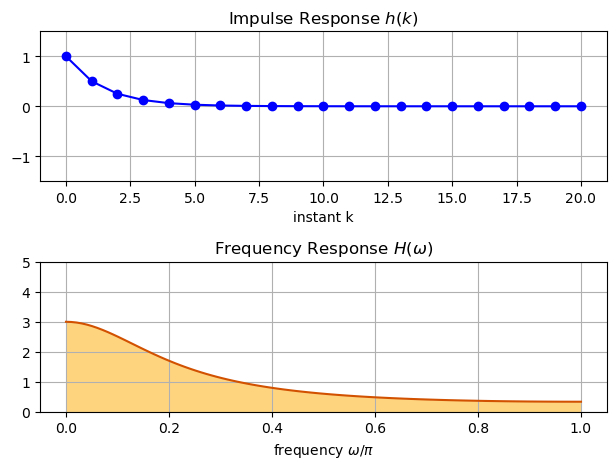

In [27]:
%run ./visualizing_ar_2_processes.py 

Le test ADF est implémenté en python dans la bibliothèque statsmodels.

adfuller renvoie entre autres : 

- la statistique de test
- la p-value associée

[source](https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.adfuller.html)

In [3]:
synthetic_ts = ts_nonstationary_I1()

results = adfuller(synthetic_ts)

results

(np.float64(-2.5376073861549),
 np.float64(0.10659006316293884),
 4,
 195,
 {'1%': np.float64(-3.464337030867007),
  '5%': np.float64(-2.876478799035722),
  '10%': np.float64(-2.574733103221565)},
 np.float64(517.4692602942748))

In [4]:
pval = results[1]
print("ADF p-value : {:.2f}".format(pval))

ADF p-value : 0.11


## 2. Stationnariser une série temporelle


### 2.1. Différenciation simple



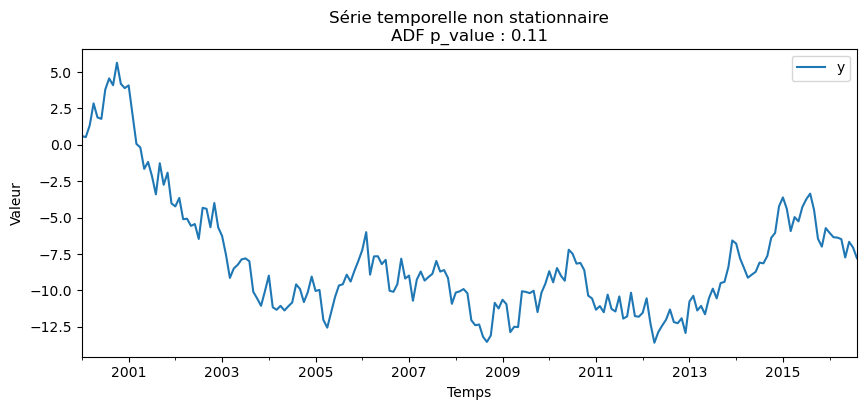

In [5]:
ts = ts_nonstationary_I1()

adf_p_value = adfuller(ts)[1]

ts.plot(title="Série temporelle non stationnaire\nADF p_value : {:.2f}".format(adf_p_value), figsize=(10, 4))
plt.xlabel("Temps")
plt.ylabel("Valeur")
plt.show();


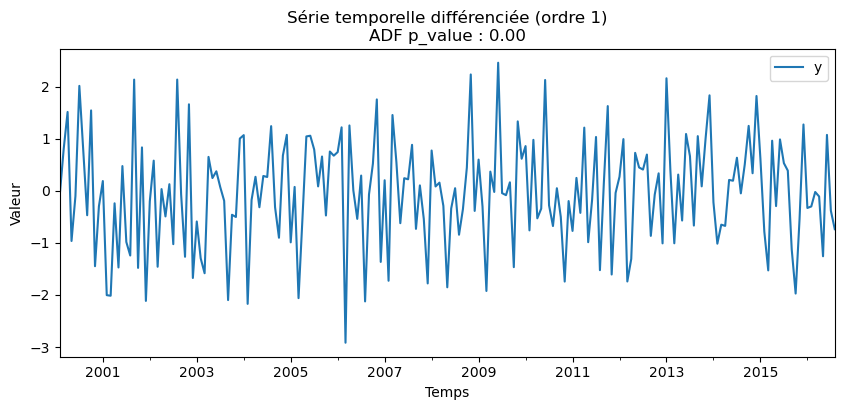

In [6]:
ts_diff = ts.diff().dropna()

adf_p_value_diff = adfuller(ts_diff)[1]

ts_diff.plot(title="Série temporelle différenciée (ordre 1)\nADF p_value : {:.2f}".format(adf_p_value_diff), figsize=(10, 4))
plt.xlabel("Temps")
plt.ylabel("Valeur")
plt.show();

### 2.2. Double différenciation

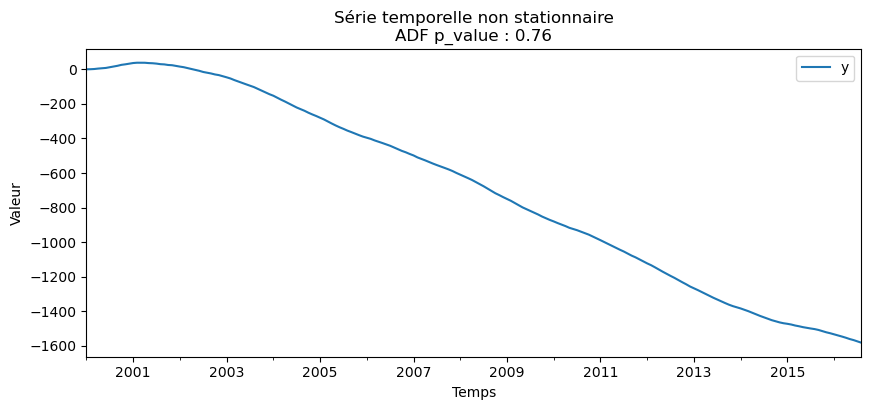

In [7]:
ts = ts_nonstationary_I2()

adf_p_value = adfuller(ts)[1]
ts.plot(title="Série temporelle non stationnaire\nADF p_value : {:.2f}".format(adf_p_value), figsize=(10, 4))
plt.xlabel("Temps")
plt.ylabel("Valeur")
plt.show();

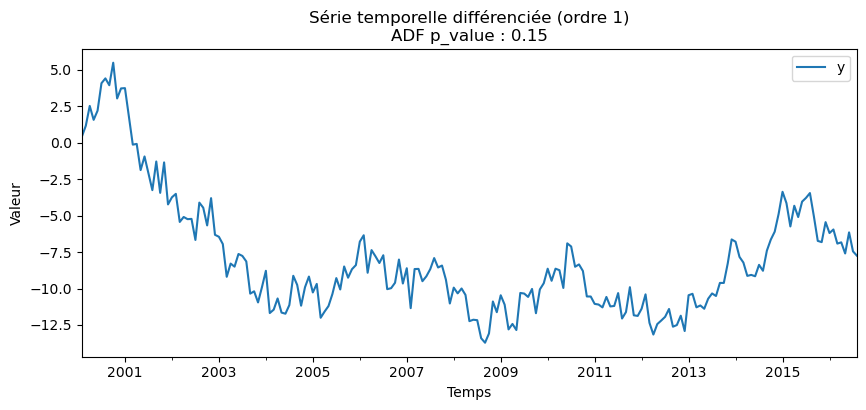

In [8]:
ts_diff = ts.diff().dropna()

adf_p_value_diff = adfuller(ts_diff)[1]

ts_diff.plot(title="Série temporelle différenciée (ordre 1)\nADF p_value : {:.2f}".format(adf_p_value_diff), figsize=(10, 4))
plt.xlabel("Temps")
plt.ylabel("Valeur")
plt.show();

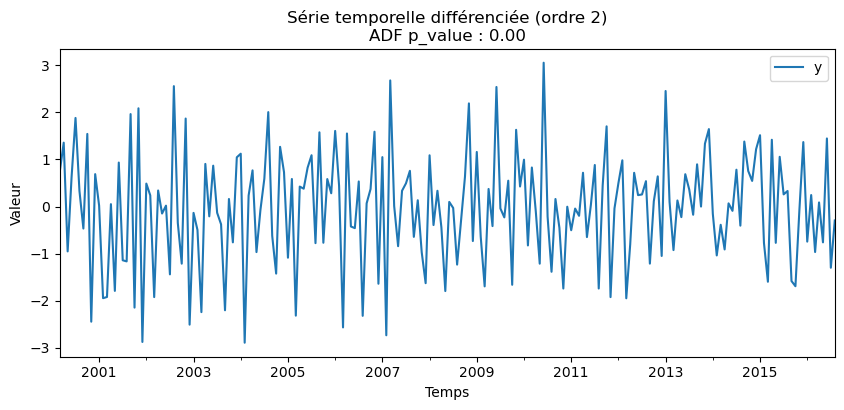

In [12]:
ts_diff2 = ts_diff.diff().dropna()

adf_p_value_diff2 = adfuller(ts_diff2)[1]

ts_diff2.plot(title="Série temporelle différenciée (ordre 2)\nADF p_value : {:.2f}".format(adf_p_value_diff2), figsize=(10, 4))
plt.xlabel("Temps")
plt.ylabel("Valeur")
plt.show();

### 2.3. Différenciation saisonnière


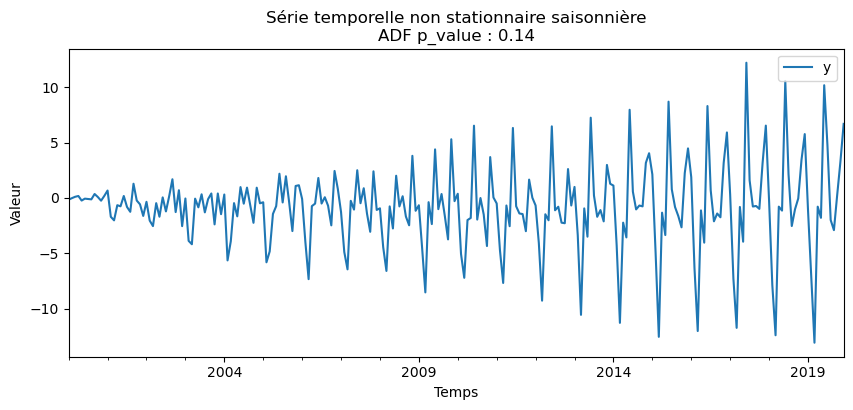

In [9]:
ts = ts_nonstationary_seasonal()
adf_p_value = adfuller(ts)[1]
ts.plot(title="Série temporelle non stationnaire saisonnière\nADF p_value : {:.2f}".format(adf_p_value), figsize=(10, 4))
plt.xlabel("Temps")
plt.ylabel("Valeur")
plt.show();

In [10]:
ts.index.freq

<MonthEnd>

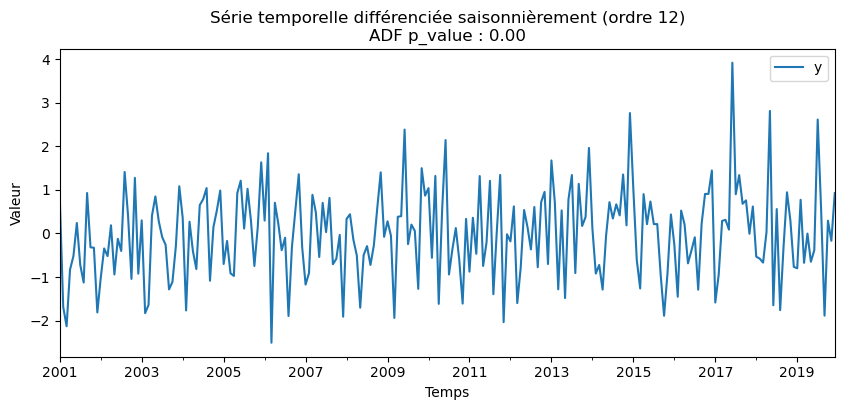

In [11]:
# seasonal difference
ts_seasonal_diff = ts.diff(12).dropna()

adf_p_value_seasonal_diff = adfuller(ts_seasonal_diff)[1]

ts_seasonal_diff.plot(title="Série temporelle différenciée saisonnièrement (ordre 12)\nADF p_value : {:.2f}".format(adf_p_value_seasonal_diff), figsize=(10, 4))
plt.xlabel("Temps")
plt.ylabel("Valeur")
plt.show();

### 2.4. Stabilisation de la variance LOG / BOX-COX

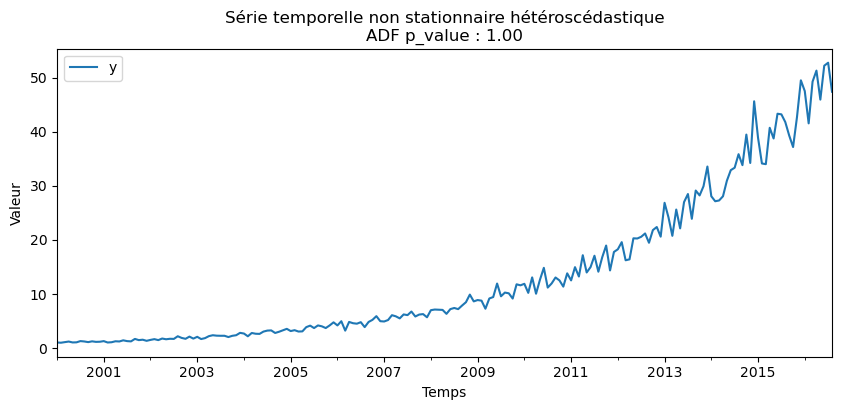

In [13]:
ts = ts_nonstationary_heteroskedastic()
adf_p_value = adfuller(ts)[1]
ts.plot(title="Série temporelle non stationnaire hétéroscédastique\nADF p_value : {:.2f}".format(adf_p_value), figsize=(10, 4))
plt.xlabel("Temps")
plt.ylabel("Valeur")
plt.show();

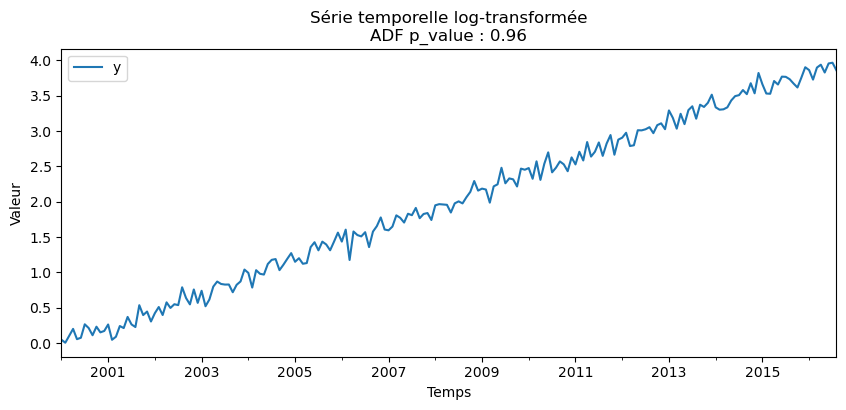

In [14]:
ts_log = np.log(ts)
adf_p_value_log = adfuller(ts_log)[1]
ts_log.plot(title="Série temporelle log-transformée\nADF p_value : {:.2f}".format(adf_p_value_log), figsize=(10, 4))
plt.xlabel("Temps")
plt.ylabel("Valeur")
plt.show();

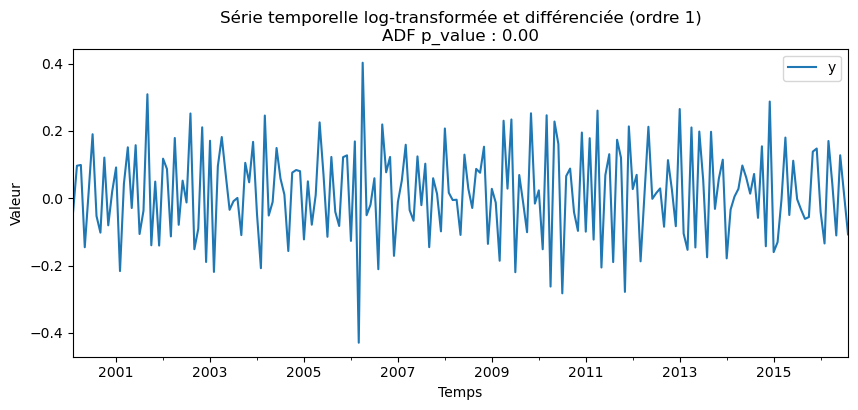

In [15]:
ts_log_diff = ts_log.diff().dropna()
adf_p_value_log_diff = adfuller(ts_log_diff)[1]

ts_log_diff.plot(title="Série temporelle log-transformée et différenciée (ordre 1)\nADF p_value : {:.2f}".format(adf_p_value_log_diff), figsize=(10, 4))    
plt.xlabel("Temps")
plt.ylabel("Valeur")
plt.show();


## 4. Un peu de tout s'il vous plaît ! 

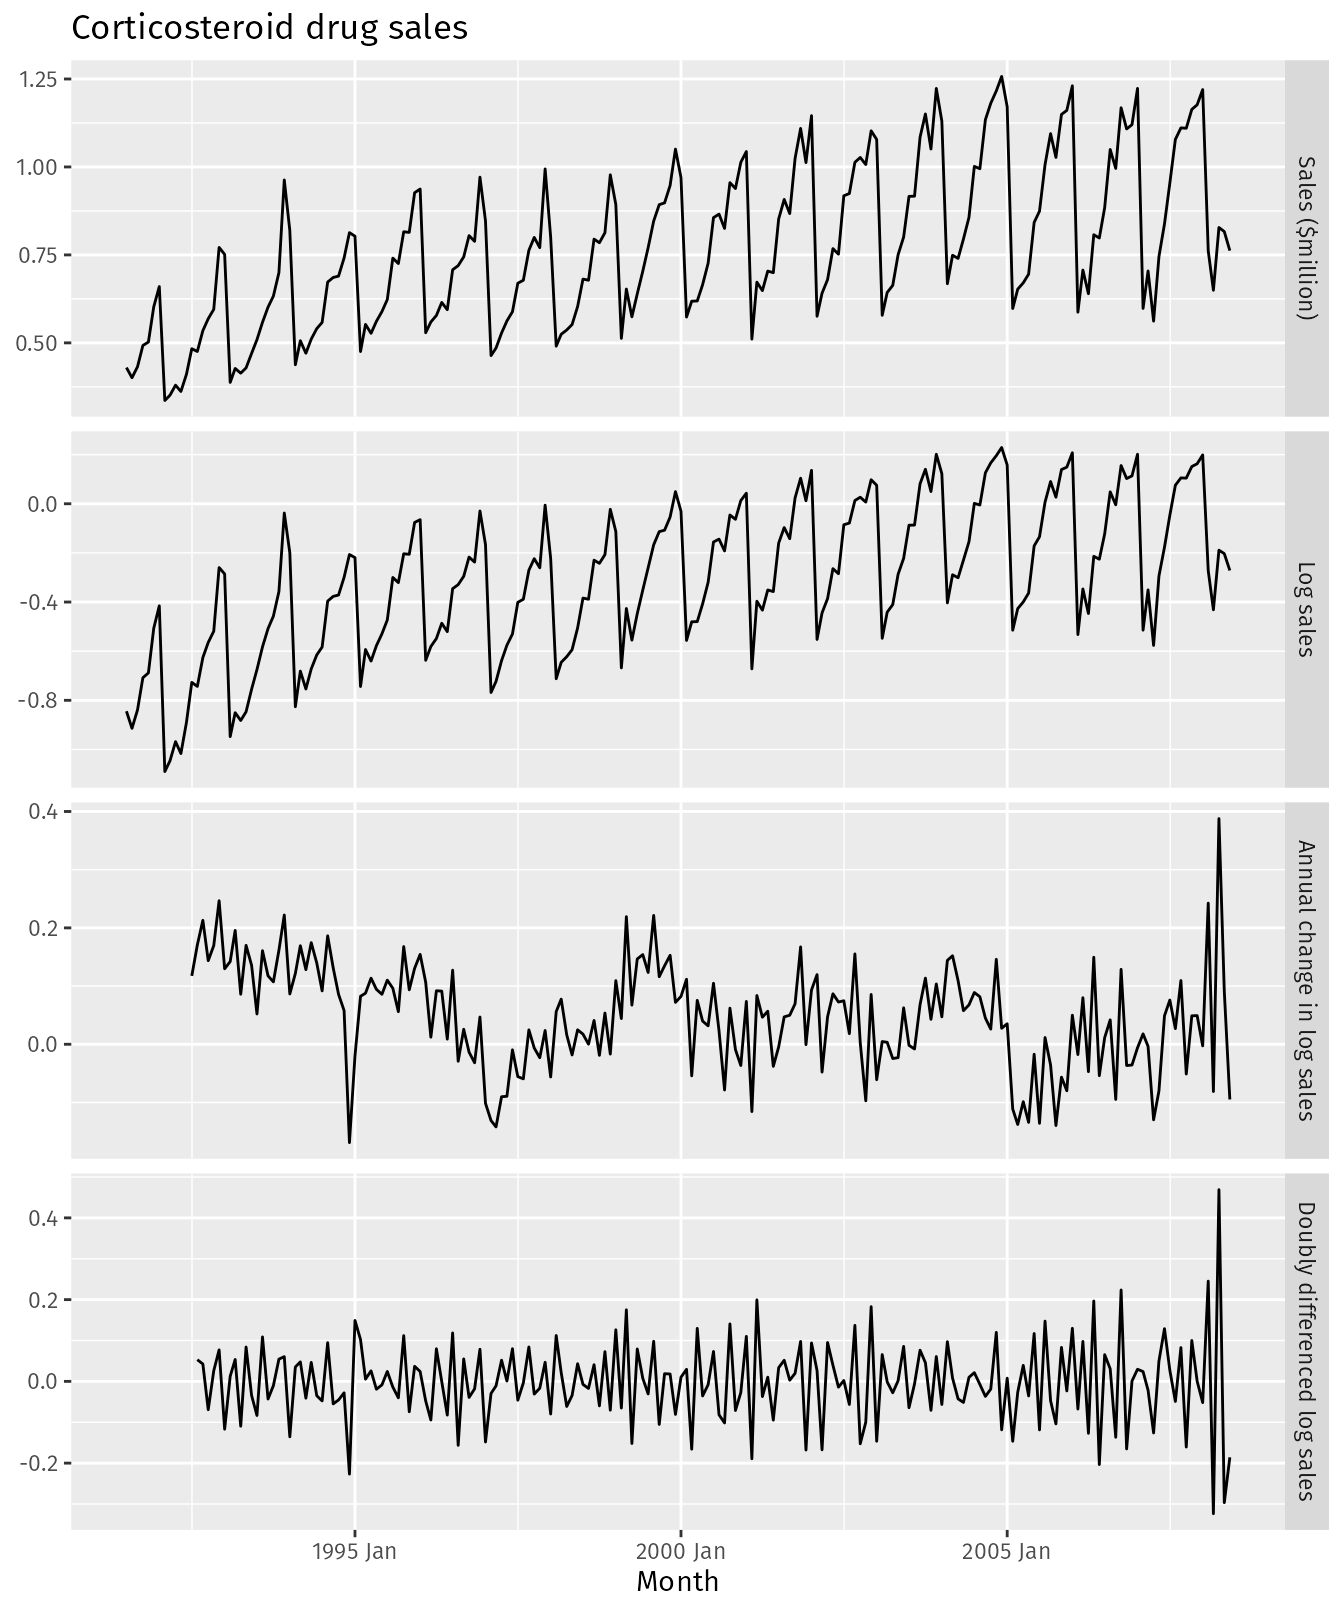


source :  [Forecasting Principles](https://otexts.com/fpp3/stationarity.html) 

## 4. A votre tour !

Stationnarisez les séries suivantes

In [25]:
from utils import ts_for_students
## mettez votre random seed
YOUR_RANDOM_SEED = 12
ts1, ts2, ts3, ts4, ts5 = ts_for_students(YOUR_RANDOM_SEED)

In [26]:
ts1

,y
2000-01-31,0.625243
2000-02-29,0.079035
2000-03-31,0.535783
2000-04-30,-1.618512
2000-05-31,-1.888943
...,...
2016-04-30,-2591.884142
2016-05-31,-2626.047874
2016-06-30,-2659.492651
2016-07-31,-2694.326878
